In [68]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [69]:
# load diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

params = {
    "n_estimators": 1000,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

[13:37:57] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "min_samples_split" } are not used.

Mean Squared Error: 3840.4466470746233


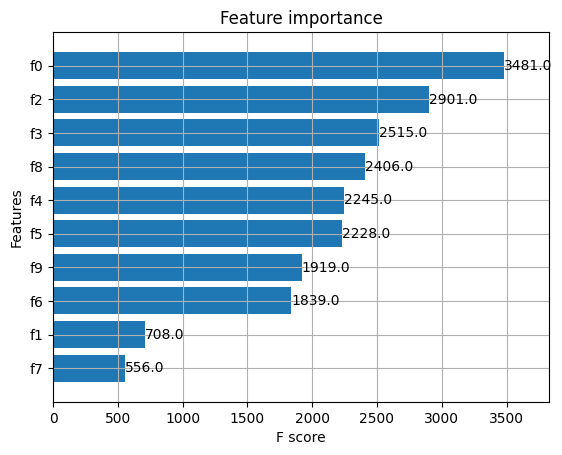

In [71]:
model = xgb.XGBRegressor(**params)
#fit the model to the training data

model.fit(X_train, y_train)
#make predictions on the test data

y_pred = model.predict(X_test)
#calculate the mean squared error of the model on the test data

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
#plot feature importance

xgb.plot_importance(model, max_num_features=10, height=0.8, importance_type='weight')
plt.show()

In [72]:
# create counter factuals
import dice_ml

# create normal prediction
myData = diabetes.data[0]
myDataPredict = model.predict([myData])
print(myDataPredict)
print(myData)

# convert data to pandas dataframe
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

# target is continuous. find example where values is less than 100
d = dice_ml.Data(dataframe=diabetes_df, continuous_features=diabetes.feature_names, outcome_name='target')
#define the model

def model_fn(inputs):
    return model.predict(inputs)
# initiate the dice object

exp = dice_ml.Dice(d, model_fn)
#generate counterfactuals

counterfactuals = exp.generate_counterfactuals(myData.reshape(1, -1), total_CFs=10, desired_class="opposite", proximity_weight=1.5, diversity_weight=1.0)
#print counterfactuals

for i, cf in enumerate(counterfactuals.final_cfs):
    cf_pred = model.predict(np.array(cf).reshape(1, -1))
    print(f"Counterfactual {i+1}:\nPrediction: {cf_pred},\nData: {cf}\n")
    if cf_pred < 100:
        print(f"Good Counterfactual Found: {cf_pred}")

[171.41791]
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


AttributeError: 'function' object has no attribute 'backend'